In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
#import api_keys
import seaborn as sns

In [3]:
#function to set title, xlabel, ylabel, width and height for the seaborn plot
def set_snsplot(g,title,xlabel,ylabel,width,height):
    g.set(title=title,xlabel=xlabel,ylabel=ylabel)
    g.fig.set_figwidth(width)
    g.fig.set_figheight(height)
    

In [15]:
#api_key = api_keys.api_key
#Get FDA food event data between Jan 01, 2004 and Jan 1, 2016. 
base_url1 = "https://api.fda.gov/food/event.json?search=date_started:[20040101+TO+20160101]&limit=1000"
food_event_data = requests.get(base_url1).json()

#print(food_event_data)
# if 'results' key is present in the JSON data from request and its not empty, process the data
if(('results' in food_event_data) and (bool(food_event_data['results']) == True)):
    print(food_event_data['results'])

[{'report_number': '172595', 'outcomes': ['Medically Important'], 'date_created': '20131218', 'reactions': ['HAEMATOCHEZIA', 'DIARRHOEA'], 'date_started': '20131113', 'consumer': {'age': '56', 'age_unit': 'year(s)', 'gender': 'M'}, 'products': [{'role': 'SUSPECT', 'name_brand': 'TRUBIOTICS (BIFIDOBACTERIUM + LACTOBACILLUS) CAPSULE', 'industry_code': '54', 'industry_name': 'Vit/Min/Prot/Unconv Diet(Human/Animal)'}]}, {'report_number': '109917', 'outcomes': ['Other Outcome'], 'date_created': '20090206', 'reactions': ['VOMITING', 'DIARRHOEA'], 'date_started': '20090107', 'consumer': {'age': '70', 'age_unit': 'year(s)', 'gender': 'M'}, 'products': [{'role': 'SUSPECT', 'name_brand': 'KEEBLER TOASTY PEANUT BUTTER SANDWICH', 'industry_code': '3', 'industry_name': 'Bakery Prod/Dough/Mix/Icing'}]}, {'report_number': '121003', 'outcomes': ['Patient Visited Healthcare Provider', 'Required Intervention'], 'date_created': '20091208', 'reactions': ['SKIN BURNING SENSATION', 'PAIN', 'GYNAECOMASTIA', 

In [16]:
#Empty list to append the food event report details
report_number_list =[]
outcomes_list = []
date_created_list = []
date_started_list = []
consumer_age_list = []
consumer_age_unit_list = []
consumer_gender_list = []

event_report_reaction =[]
event_report_product =[]
event_report_outcome =[]


#results key from the JSON data of the request contains the information about the food event.
if(('results' in food_event_data) and (bool(food_event_data['results']) == True)):
    for foodevent_record in food_event_data['results']:
            
        report_number_list.append(foodevent_record['report_number'])
        date_started_list.append(foodevent_record['date_started'])
        date_created_list.append(foodevent_record['date_created'])
        
        #If consumer details are available in the event report. 
        if(bool(foodevent_record['consumer']) == True):
            consumer_age_list.append(foodevent_record['consumer']['age'])
            consumer_age_unit_list.append(foodevent_record['consumer']['age_unit'])
            #Some reports, doesn't have gender data, hence checking if 'gender' key exists
            if('gender' in foodevent_record['consumer']):
                consumer_gender_list.append(foodevent_record['consumer']['gender'])
            else:
                consumer_gender_list.append("")
        else:
            #If consumer details are not available append empty values
            consumer_age_list.append("")
            consumer_age_unit_list.append("")
            consumer_gender_list.append("")
          
        #Outcomes for the food event. There can be more than 1 outcome 
        for outcome in foodevent_record['outcomes']:
            event_report_outcome.append({'report_number':foodevent_record['report_number'],"outcome" : outcome})

        
        #reactions for the food event. There can be more than 1 reaction
        for reaction in foodevent_record['reactions']:
            event_report_reaction.append({'report_number':foodevent_record['report_number'],"reaction" : reaction})
            
            
        #Product records for the event report. There can be more than 1 product/industry associated with it
        for product_record in foodevent_record['products']:
            event_report_product.append({"report_number":foodevent_record['report_number'],
                                         "role": product_record['role'],
                                         "name_brand":product_record['name_brand'],
                                         "industry_code":product_record['industry_code'],
                                         "industry_name":product_record['industry_name']})
            
            
#Create dictionary with column names and values for food event report 
food_event_report_dict = {"report_number":report_number_list,
                            "date_created":date_created_list,
                            "date_started":date_started_list,
                            "consumer_age":consumer_age_list,
                            "consumer_age_unit":consumer_age_unit_list,
                            "consumer_gender":consumer_gender_list
                        }

#Dataframe for food event report
food_event_report_df = pd.DataFrame(food_event_report_dict)
#Dataframe for food event report reactions. report_number is common
food_event_report_reactions_df = pd.DataFrame(event_report_reaction)
#Dataframe for food event report products. report_number is common
food_event_report_products_df = pd.DataFrame(event_report_product)
#Dataframe for food event report outcomes. report_number is common
food_event_report_outcomes_df = pd.DataFrame(event_report_outcome)

#Display first 5 records of dataframes
display(food_event_report_df.head())   
display(food_event_report_reactions_df.head())
display(food_event_report_outcomes_df.head())
display(food_event_report_products_df.head())


,report_number,date_created,date_started,consumer_age,consumer_age_unit,consumer_gender
0,172595,20131218,20131113,56,year(s),M
1,109917,20090206,20090107,70,year(s),M
2,121003,20091208,20090101,37,year(s),M
3,126994,20100604,20080718,19,year(s),
4,131017,20101015,20100822,22,year(s),F


,report_number,reaction
0,172595,HAEMATOCHEZIA
1,172595,DIARRHOEA
2,109917,VOMITING
3,109917,DIARRHOEA
4,121003,SKIN BURNING SENSATION


,report_number,outcome
0,172595,Medically Important
1,109917,Other Outcome
2,121003,Patient Visited Healthcare Provider
3,121003,Required Intervention
4,126994,Life Threatening


,report_number,role,name_brand,industry_code,industry_name
0,172595,SUSPECT,TRUBIOTICS (BIFIDOBACTERIUM + LACTOBACILLUS) C...,54,Vit/Min/Prot/Unconv Diet(Human/Animal)
1,109917,SUSPECT,KEEBLER TOASTY PEANUT BUTTER SANDWICH,3,Bakery Prod/Dough/Mix/Icing
2,121003,SUSPECT,BOSC ENTERPRISES MAGNADROL,54,Vit/Min/Prot/Unconv Diet(Human/Animal)
3,126994,SUSPECT,5 HOUR ENERGY,54,Vit/Min/Prot/Unconv Diet(Human/Animal)
4,131017,SUSPECT,BRAZILIAN BLOWOUT,53,Cosmetics


,count
reaction,
DIARRHOEA,176
VOMITING,170
OVARIAN CANCER,128
NAUSEA,116
ABDOMINAL PAIN,104


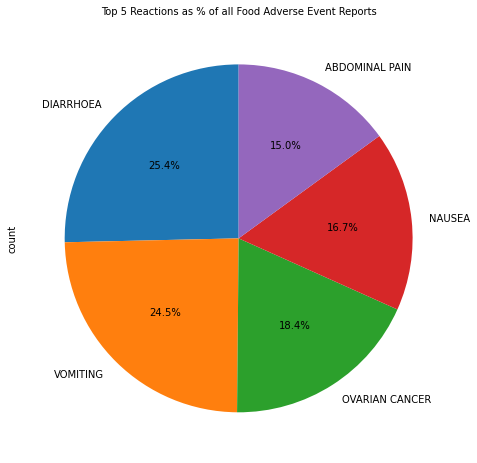

In [18]:
#plot pie chart to display top 5 reactions
fig,ax = plt.subplots()
fig.set_size_inches([8,8])

food_event_report_reactions_count = pd.DataFrame(food_event_report_reactions_df.value_counts("reaction"),columns=['count'])

food_event_report_reactions_count = food_event_report_reactions_count.sort_values("count",ascending=False).head(5)
display(food_event_report_reactions_count)


food_event_report_reactions_count.plot(kind='pie',y="count",ax=ax,
                                 startangle=90,shadow=False,labels=food_event_report_reactions_count.index,
                                 autopct='%1.1f%%',legend=False,fontsize=10)


ax.set_title("Top 5 Reactions as % of all Food Adverse Event Reports",fontsize=10)
plt.show()


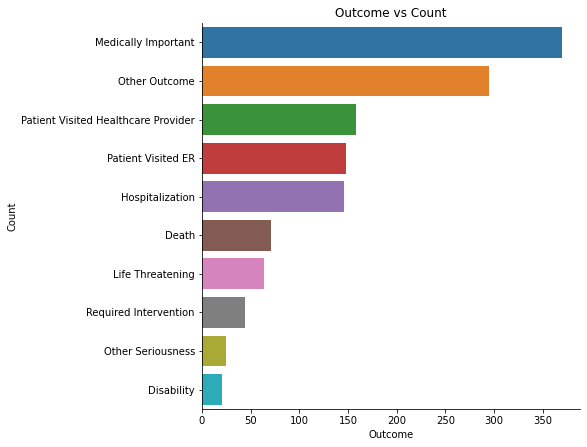

In [19]:
#Outcome vs count report
food_event_report_outcomes_count =  pd.DataFrame(food_event_report_outcomes_df.value_counts("outcome"),columns=['count'])

g = sns.catplot(kind="bar", y=food_event_report_outcomes_count.index,x="count", data = food_event_report_outcomes_count) 
#Call function to set plot labels, title, and size
set_snsplot(g,"Outcome vs Count","Outcome","Count",12,6)


In [20]:
#Get the dataframe ready for plot - "Display of Events by Outcomes for Ovarian Cancer Reaction"

# Query dataframe to get reports only for reaction 'OVARIAN CANCER'
ovcancer_reactions_df = food_event_report_reactions_df.query("reaction=='OVARIAN CANCER'")

#merge food event report df with the result of ovarian cancer query on report_number
inner_merge_reportno_df = pd.merge(food_event_report_df, ovcancer_reactions_df, on="report_number")
#merge with products df with merged df from above step
inner_merge_reportno_df = pd.merge(inner_merge_reportno_df,food_event_report_products_df, on="report_number")
#merge with outcomes df with merged df from above step
inner_merge_reportno_df = pd.merge(inner_merge_reportno_df,food_event_report_outcomes_df, on="report_number")

#Here, merged data has all the data of report, consumer details(if available), reaction, outcomes and products
display(inner_merge_reportno_df.head())

,report_number,date_created,date_started,consumer_age,consumer_age_unit,consumer_gender,reaction,role,name_brand,industry_code,industry_name,outcome
0,2018-CFS-004025,20180308,20130101,,,,OVARIAN CANCER,SUSPECT,EXEMPTION 4,53,Cosmetics,Death
1,214530,20170629,20151001,,,,OVARIAN CANCER,SUSPECT,EXEMPTION 4,53,Cosmetics,Medically Important
2,213297,20170608,20120101,,,,OVARIAN CANCER,SUSPECT,EXEMPTION 4,53,Cosmetics,Medically Important
3,203079,20161019,20140913,,,,OVARIAN CANCER,SUSPECT,EXEMPTION 4,53,Cosmetics,Death
4,203079,20161019,20140913,,,,OVARIAN CANCER,SUSPECT,EXEMPTION 4,53,Cosmetics,Patient Visited Healthcare Provider


In [21]:
#Convert the string date_created and date_started to datetime format
inner_merge_reportno_df["date_created"] = pd.to_datetime(inner_merge_reportno_df["date_created"])
inner_merge_reportno_df["date_started"] = pd.to_datetime(inner_merge_reportno_df["date_started"])

#Get only the year part of created and started date
inner_merge_reportno_df['year_created'] = pd.DatetimeIndex(inner_merge_reportno_df['date_created']).year
inner_merge_reportno_df['year_started'] = pd.DatetimeIndex(inner_merge_reportno_df['date_started']).year



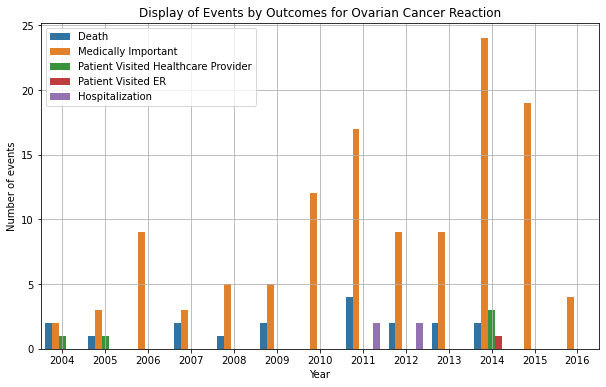

In [23]:
#plot - Display of Events by Outcomes for Ovarian Cancer Reaction
fig,ax = plt.subplots()
fig.set_size_inches([10,6])
ax = sns.countplot(x =inner_merge_reportno_df.year_started,data = inner_merge_reportno_df,ax=ax,hue=inner_merge_reportno_df.outcome)
ax.set_title("Display of Events by Outcomes for Ovarian Cancer Reaction")
ax.set_ylabel("Number of events")
ax.set_xlabel("Year")
ax.legend(loc='upper left')
ax.grid(True)


In [13]:
#Get another 1000 records for a date range as below
#Get FDA food event data between Jan 01, 2016 and Jan 1, 2021. 

base_url1 = "https://api.fda.gov/food/event.json?search=date_started:[20160101+TO+20210101]&limit=1000"
food_event_data_yr16to21 = requests.get(base_url1).json()

#print(food_event_data_yr16to21)

# if 'results' key is present in the JSON data from request and its not empty, process the data
if(('results' in food_event_data_yr16to21) and (bool(food_event_data_yr16to21['results']) == True)):
    print(food_event_data_yr16to21['results'])
    


[{'report_number': '194090', 'outcomes': ['Hospitalization', 'Medically Important', 'Patient Visited ER'], 'date_created': '20160304', 'reactions': ['BLOOD PRESSURE INCREASED', 'HEADACHE'], 'date_started': '20160215', 'consumer': {'age': '63', 'age_unit': 'year(s)', 'gender': 'M'}, 'products': [{'role': 'SUSPECT', 'name_brand': 'SUPER BETA PROSTATE', 'industry_code': '54', 'industry_name': 'Vit/Min/Prot/Unconv Diet(Human/Animal)'}]}, {'report_number': '196964', 'outcomes': ['Hospitalization', 'Patient Visited ER'], 'date_created': '20160606', 'reactions': ['PAIN', 'VOMITING', 'ABDOMINAL PAIN UPPER', 'ABDOMINAL DISTENSION'], 'date_started': '20160123', 'consumer': {'age': '31', 'age_unit': 'year(s)', 'gender': 'F'}, 'products': [{'role': 'SUSPECT', 'name_brand': 'EXEMPTION 4', 'industry_code': '54', 'industry_name': 'Vit/Min/Prot/Unconv Diet(Human/Animal)'}]}, {'report_number': '2019-CFS-004233', 'outcomes': ['Medically Important'], 'date_created': '20190425', 'reactions': ['CHEMICAL IN